In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Load the datasets

In [2]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [18]:
X_test.shape

(10000, 28, 28)

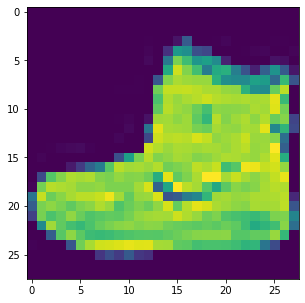

In [4]:
#visualize
plt.figure(figsize=(10,5))
plt.imshow(X_train[0])

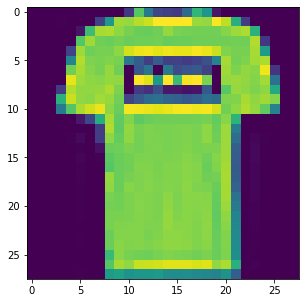

In [5]:
plt.figure(figsize=(10,5))
plt.imshow(X_train[1])

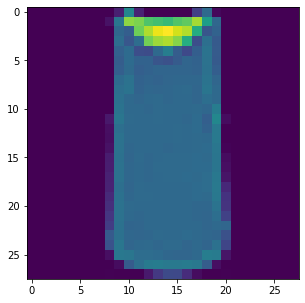

In [6]:
plt.figure(figsize=(10,5))
plt.imshow(X_train[2])

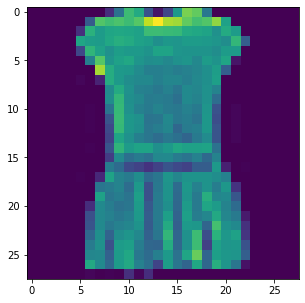

In [7]:
plt.figure(figsize=(10,5))
plt.imshow(X_train[3])

In [16]:
y_train.shape

(60000,)

In [8]:
class_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [15]:
class_labels[y_train[0]]

'Ankle boot'

# Preprocessing

In [17]:
#highest value of rgb is 255.So, dividing all the data with 255
X_train_scaled = X_train/255
X_test_scaled = X_test/255

# Model building

In [21]:
def model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(4000, activation='relu'),
        keras.layers.Dense(2000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
    ])
    
    model.compile(optimizer ='adam',
                 loss = 'sparse_categorical_crossentropy',
                 metrics = ['accuracy'])
    
    return model

In [22]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = model()
    cpu_model.fit(X_train_scaled,y_train,epochs=1)

1875/1875 [==============================] - 168s 89ms/step - loss: 0.5000 - accuracy: 0.8190
2min 48s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [24]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_model = model()
    gpu_model.fit(X_train_scaled,y_train,epochs=1)

1875/1875 [==============================] - 26s 12ms/step - loss: 0.5050 - accuracy: 0.8177
27.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
